# Refining a KNeighbors Regressor model
The goal of this project is to manually refine the performance of a KNeighbors Regressor model applied to a dataset of used car listings. The idea is to construct a model capable of predicting an appropriate listing price given parameters like engine size, compression ratio, etc.

In [1]:
import pandas as pd
import numpy as np

## Data read-in and selection

In [2]:
# Read-in the data
cars = pd.read_csv("imports-85.data")
print("Dataset length: ",cars.shape[0])
cars.head()

Dataset length:  204


,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [3]:
cols = ["symboling","normalized_losses","make","fuel_type","aspiration", "num_of_doors",
        "body_style","drive_wheels", "engine_location","wheel_base", "length", "width",
        "height","curb_weight", "engine_type","num_of_cylinders","engine_size","fuel_system", 
        "bore","stroke","compression_ratio","horsepower","peak_rpm","city_mpg","highway_mpg",
        "price"]
cars.columns = cols
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


The dataset contains several categorical features beside the numeric ones. We will ignore these for now and focus on numeric features - however we can note that:
- Symboling is an actuarial term that denotes the assignment of a risk 'symbol' associated with a listing price, with positive numbers indicating a larger risk than its price would indicate. Negative numbers conversely would indicate a safe investment.
- The normalized_losses column is to be intepreted as the normalized average loss in terms of insurance payments per insured year.

In [4]:
numeric = ["normalized_losses","wheel_base", "length","width","height","curb_weight",
           "engine_size","bore","stroke","compression_ratio","horsepower","peak_rpm",
           "city_mpg","highway_mpg","price"]

In [5]:
cars_bkp = cars
cars = cars[numeric]

## Dealing with null values
We should check for null values in the data columns since models cannot interpret these. The 'normalized_losses' column features some very noticeable "?" values which are in fact strings, so let's replace these with proper NaN values before dealing with nulls as a whole.

In [6]:
cars = cars.replace("?", np.nan)
cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
3,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
4,NaN,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250


In [7]:
cars = cars.astype(float)
cars.isnull().sum()

normalized_losses    40
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

There are a few cars with no price - these defeat the purpose so we can just get rid of them.

In [8]:
cars = cars[cars["price"].notnull()]
cars.isnull().sum()

normalized_losses    36
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

Now we must fill the null values with usable values. In our case we will fill them using the mean value of the corresponding column.

In [9]:
cars = cars.fillna(cars.mean())

In [10]:
cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
1,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
2,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
3,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
4,122.0,99.8,177.3,66.3,53.1,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0


## Scaling of the features - normal distribution
All features within our dataset have differente ranges - this may affect the performance of the model as certain features end up dominating others. To circumvent this problem we must rescale the numeric features down to a shared, standard scale. We can do so by either rescaling all features to the same range (usually from 0 to 1) or by rescaling all features to a normal distribution. Here we will use the latter method.

In [11]:
# Normalization can be done by subtracting the average and dividing by the standard deviation
features = cars.columns.drop("price")
target = cars["price"]
cars = (cars[features]-cars[features].mean())/cars[features].std()
cars = pd.concat([cars,target],axis=1)
cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.000000,-1.697177,-0.439616,-0.855008,-2.055427,-0.014857,0.075389,0.521295,-1.845608,-0.291493,0.204013,-0.246603,-0.652936,-0.542680,16500.0
1,0.000000,-0.720075,-0.245239,-0.189262,-0.572999,0.515422,0.603594,-2.420296,0.668901,-0.291493,1.352043,-0.246603,-0.963857,-0.689152,16500.0
2,1.309368,0.157661,0.192109,0.143611,0.209393,-0.421726,-0.428806,-0.521295,0.446096,-0.042375,-0.036272,0.796716,-0.186553,-0.103263,13950.0
3,1.309368,0.091417,0.192109,0.238717,0.209393,0.517350,0.219445,-0.521295,0.446096,-0.540611,0.310807,0.796716,-1.119318,-1.275042,17450.0
4,0.000000,0.157661,0.248803,0.191164,-0.284750,-0.093917,0.219445,-0.521295,0.446096,-0.416052,0.177315,0.796716,-0.963857,-0.835625,15250.0


## KNeighbor Regressor
Here we will define a custom function to calculate the mean and standard deviation of the RMSEs produced by a KNeighbors Regressor applied to a number k of folds made from our data.

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

def knn_kfold_test(features,target,k,folds,data):
    knn = KNeighborsRegressor(n_neighbors = k)
    kf = KFold(folds, shuffle=True, random_state=1)
    if type(features) is str:
        mses = cross_val_score(knn, data[[features]], data[target], scoring="neg_mean_squared_error", cv=kf)
    else:
        mses = cross_val_score(knn, data[features], data[target], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    return np.mean(rmses), np.std(rmses)

### Feature selection
Before delving into model performance proper, let's choose the best features. We'll make predictions using the model and each of the available features sequentially, then choose the features with the lowest RMSEs.

In [13]:
target = "price"
all_feats = [x for x in cars.columns if x != "price"]

In [14]:
results_1 = pd.DataFrame()
for i in range(len(all_feats)):
    avg_rmse, std_rmse = knn_kfold_test(all_feats[i],target,5,10,cars)
    results_1.loc[i,"feature"] = all_feats[i]
    results_1.loc[i,"avg_rmse"] = avg_rmse
    results_1.loc[i,"std_rmse"] = std_rmse
results_1 = results_1.set_index("feature")
results_1 = results_1.sort_values("avg_rmse")
results_1

,avg_rmse,std_rmse
feature,,
engine_size,3195.449171,544.422236
horsepower,3748.959876,1201.165032
curb_weight,3846.424560,1626.985526
highway_mpg,4074.103150,1378.768700
city_mpg,4198.781287,1464.095058
width,4300.834191,1432.020463
length,4939.683930,1547.338588
wheel_base,5536.891028,2001.312843
compression_ratio,6488.176227,1261.755228


### Hyperparameter optimisation
Finally, we'll cycle through different sets of features and a range of k values for the fold number and find the best combination.

In [15]:
best_2 = ["engine_size","horsepower"]
best_3 = ["engine_size","horsepower","curb_weight"]
best_4 = ["engine_size","horsepower","curb_weight","highway_mpg"]
best_5 = ["engine_size","horsepower","curb_weight","highway_mpg","city_mpg"]
best_6 = ["engine_size","horsepower","curb_weight","highway_mpg","city_mpg","width"]
k_nums = np.arange(1,21)

In [16]:
results_best_2 = pd.DataFrame()
for i in range(len(k_nums)):
    avg_rmse, std_rmse = knn_kfold_test(best_2,target,k_nums[i],10,cars)
    results_best_2.loc[i,"n_neighbors"] = k_nums[i]
    results_best_2.loc[i,"avg_rmse"] = avg_rmse
    results_best_2.loc[i,"std_rmse"] = std_rmse
results_best_2 = results_best_2.set_index("n_neighbors")
results_best_2

,avg_rmse,std_rmse
n_neighbors,,
1.0,2910.077988,581.167571
2.0,2838.918764,752.420520
3.0,2741.120923,640.741542
4.0,2896.758998,678.371483
5.0,2977.122767,747.896553
6.0,3147.585396,863.115233
7.0,3180.104510,825.360218
8.0,3258.467842,898.902803
9.0,3336.101951,1025.340246


In [17]:
results_best_3 = pd.DataFrame()
for i in range(len(k_nums)):
    avg_rmse, std_rmse = knn_kfold_test(best_3,target,k_nums[i],10,cars)
    results_best_3.loc[i,"n_neighbors"] = k_nums[i]
    results_best_3.loc[i,"avg_rmse"] = avg_rmse
    results_best_3.loc[i,"std_rmse"] = std_rmse
results_best_3 = results_best_3.set_index("n_neighbors")
results_best_3

,avg_rmse,std_rmse
n_neighbors,,
1.0,2663.644275,749.259894
2.0,2885.569727,883.086648
3.0,2855.069821,840.739310
4.0,2902.556060,1034.174476
5.0,3147.903201,1093.622605
6.0,3200.480663,1014.541261
7.0,3173.070901,993.489945
8.0,3215.717475,1008.104777
9.0,3267.430670,1113.709298


In [18]:
results_best_4 = pd.DataFrame()
for i in range(len(k_nums)):
    avg_rmse, std_rmse = knn_kfold_test(best_4,target,k_nums[i],10,cars)
    results_best_4.loc[i,"n_neighbors"] = k_nums[i]
    results_best_4.loc[i,"avg_rmse"] = avg_rmse
    results_best_4.loc[i,"std_rmse"] = std_rmse
results_best_4 = results_best_4.set_index("n_neighbors")
results_best_4

,avg_rmse,std_rmse
n_neighbors,,
1.0,2457.425623,926.262568
2.0,2575.092707,915.770208
3.0,2540.915005,832.886926
4.0,2668.456207,995.346966
5.0,2983.740665,1061.684816
6.0,3116.236539,1127.244327
7.0,3147.689984,1140.437324
8.0,3243.622232,1163.149108
9.0,3373.784883,1287.768086


In [19]:
results_best_5 = pd.DataFrame()
for i in range(len(k_nums)):
    avg_rmse, std_rmse = knn_kfold_test(best_5,target,k_nums[i],10,cars)
    results_best_5.loc[i,"n_neighbors"] = k_nums[i]
    results_best_5.loc[i,"avg_rmse"] = avg_rmse
    results_best_5.loc[i,"std_rmse"] = std_rmse
results_best_5 = results_best_5.set_index("n_neighbors")
results_best_5

,avg_rmse,std_rmse
n_neighbors,,
1.0,2476.045222,985.396219
2.0,2521.743287,984.310544
3.0,2526.756986,775.653331
4.0,2704.655440,959.307839
5.0,2987.701153,1121.306243
6.0,3074.706234,1178.712149
7.0,3138.687146,1139.113809
8.0,3198.591133,1112.937927
9.0,3331.883597,1178.726689


In [20]:
results_best_6 = pd.DataFrame()
for i in range(len(k_nums)):
    avg_rmse, std_rmse = knn_kfold_test(best_6,target,k_nums[i],10,cars)
    results_best_6.loc[i,"n_neighbors"] = k_nums[i]
    results_best_6.loc[i,"avg_rmse"] = avg_rmse
    results_best_6.loc[i,"std_rmse"] = std_rmse
results_best_6 = results_best_6.set_index("n_neighbors")
results_best_6

,avg_rmse,std_rmse
n_neighbors,,
1.0,2674.783322,989.015350
2.0,2696.962171,968.781127
3.0,2742.261204,992.171256
4.0,2821.707213,1238.869981
5.0,3017.977242,1371.929910
6.0,3134.945390,1479.008380
7.0,3135.166532,1417.926145
8.0,3149.901585,1453.540098
9.0,3232.092617,1513.356207


The sets of 4 and 5 features produced the best results, so let's zero in on the number of folds to identify the best combination overall. At this point, visualising the results is the best way to go forward.

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
results_best_4["rmse_upper"] = results_best_4["avg_rmse"]+results_best_4["std_rmse"]
results_best_4["rmse_lower"] = results_best_4["avg_rmse"]-results_best_4["std_rmse"]
results_best_5["rmse_upper"] = results_best_5["avg_rmse"]+results_best_5["std_rmse"]
results_best_5["rmse_lower"] = results_best_5["avg_rmse"]-results_best_5["std_rmse"]

Text(0.5,1,'RMSE and st.dev envelope for 4- and 5-feature models, by k')

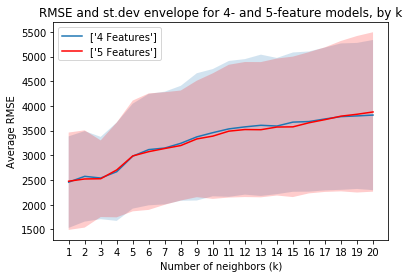

In [23]:
fig, ax = plt.subplots()
f1 = ax.plot(k_nums,results_best_4["avg_rmse"],label=["4 Features"])
f2 = ax.fill_between(k_nums, results_best_4["rmse_lower"], results_best_4["rmse_upper"], alpha=0.2)
f3 = ax.plot(k_nums,results_best_5["avg_rmse"],"r",label=["5 Features"])
f4 = ax.fill_between(k_nums, results_best_5["rmse_lower"], results_best_5["rmse_upper"], facecolor='red', alpha=0.2)
plt.legend(loc="upper left")
ax.set_xticks(k_nums)
ax.set_xlabel("Number of neighbors (k)")
ax.set_ylabel("Average RMSE")
ax.set_title("RMSE and st.dev envelope for 4- and 5-feature models, by k")

When the data is normalized to a standard distribution (using mean and standard deviation), the best model results (taking into account both average RMSE and RMSE standard deviation) are achieved for: 
- Number of neighbors (k): 3
- Number of features: 5 (engine_size, horsepower, curb_weight, highway_mpg, city_mpg)

## Scaling of the features - normal distribution
As described before, scaling the numerical features down to a normal distribution is only one possible scaling solution. Would our results improve by using a scaling of the min-max range instead? Let's find out.

In [24]:
cars = cars_bkp
cars = cars[numeric]

In [25]:
cars = cars.replace("?", np.nan)
cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
3,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
4,NaN,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250


In [26]:
cars = cars.astype(float)
cars.isnull().sum()

normalized_losses    40
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [27]:
cars = cars[cars["price"].notnull()]
cars.isnull().sum()

normalized_losses    36
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [28]:
cars = cars.fillna(cars.mean())
cars.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [29]:
cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
1,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
2,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
3,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
4,122.0,99.8,177.3,66.3,53.1,2507.0,136.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0


In [30]:
# Range scaling can be done by subtracting the minimum and dividing by the range
features = cars.columns.drop("price")
target = cars["price"]
cars = (cars[features]-cars[features].min())/(cars[features].max()-cars[features].min())
cars = pd.concat([cars,target],axis=1)
cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
1,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
2,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
3,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
4,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.283019,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,15250.0


### Feature selection

In [31]:
target = "price"
all_feats = [x for x in cars.columns if x != "price"]

In [32]:
results_1 = pd.DataFrame()
for i in range(len(all_feats)):
    avg_rmse, std_rmse = knn_kfold_test(all_feats[i],target,5,10,cars)
    results_1.loc[i,"feature"] = all_feats[i]
    results_1.loc[i,"avg_rmse"] = avg_rmse
    results_1.loc[i,"std_rmse"] = std_rmse
results_1 = results_1.set_index("feature")
results_1 = results_1.sort_values("avg_rmse")
results_1

,avg_rmse,std_rmse
feature,,
engine_size,3147.069621,518.586404
horsepower,3698.380617,1261.208163
curb_weight,3896.170054,1604.237676
highway_mpg,4032.922493,1398.002684
width,4110.547115,1570.900592
city_mpg,4112.383895,1445.789534
length,4923.899718,1544.624082
wheel_base,5610.353830,1884.363498
compression_ratio,6473.399417,1247.758487


### Hyperparameter optimisation

In [33]:
best_2 = ["engine_size","horsepower"]
best_3 = ["engine_size","horsepower","curb_weight"]
best_4 = ["engine_size","horsepower","curb_weight","highway_mpg"]
best_5 = ["engine_size","horsepower","curb_weight","highway_mpg","width"]
best_6 = ["engine_size","horsepower","curb_weight","highway_mpg","width","city_mpg"]
k_nums = np.arange(1,21)

In [34]:
results_best_2 = pd.DataFrame()
for i in range(len(k_nums)):
    avg_rmse, std_rmse = knn_kfold_test(best_2,target,k_nums[i],10,cars)
    results_best_2.loc[i,"n_neighbors"] = k_nums[i]
    results_best_2.loc[i,"avg_rmse"] = avg_rmse
    results_best_2.loc[i,"std_rmse"] = std_rmse
results_best_2 = results_best_2.set_index("n_neighbors")
results_best_2

,avg_rmse,std_rmse
n_neighbors,,
1.0,2946.876783,519.598890
2.0,2853.222755,757.933158
3.0,2748.642439,700.498863
4.0,2941.738311,691.602498
5.0,3015.896345,778.534836
6.0,3260.433064,827.178657
7.0,3240.124291,826.009721
8.0,3298.050237,895.513298
9.0,3354.488513,1003.070570


In [35]:
results_best_3 = pd.DataFrame()
for i in range(len(k_nums)):
    avg_rmse, std_rmse = knn_kfold_test(best_3,target,k_nums[i],10,cars)
    results_best_3.loc[i,"n_neighbors"] = k_nums[i]
    results_best_3.loc[i,"avg_rmse"] = avg_rmse
    results_best_3.loc[i,"std_rmse"] = std_rmse
results_best_3 = results_best_3.set_index("n_neighbors")
results_best_3

,avg_rmse,std_rmse
n_neighbors,,
1.0,2566.740628,561.640613
2.0,2900.564404,872.879216
3.0,2814.810008,814.366509
4.0,2922.287896,1021.000471
5.0,3235.319248,1060.779530
6.0,3319.991810,979.996282
7.0,3242.081102,1093.930676
8.0,3210.987568,1107.812303
9.0,3299.872703,1184.274661


In [36]:
results_best_4 = pd.DataFrame()
for i in range(len(k_nums)):
    avg_rmse, std_rmse = knn_kfold_test(best_4,target,k_nums[i],10,cars)
    results_best_4.loc[i,"n_neighbors"] = k_nums[i]
    results_best_4.loc[i,"avg_rmse"] = avg_rmse
    results_best_4.loc[i,"std_rmse"] = std_rmse
results_best_4 = results_best_4.set_index("n_neighbors")
results_best_4

,avg_rmse,std_rmse
n_neighbors,,
1.0,2307.680417,723.173238
2.0,2559.258263,924.709090
3.0,2602.667958,900.976035
4.0,2737.545844,1050.078487
5.0,3038.539025,1091.822629
6.0,3193.679624,1176.340509
7.0,3239.259271,1282.959026
8.0,3224.097429,1218.272662
9.0,3303.115533,1329.285095


In [37]:
results_best_5 = pd.DataFrame()
for i in range(len(k_nums)):
    avg_rmse, std_rmse = knn_kfold_test(best_5,target,k_nums[i],10,cars)
    results_best_5.loc[i,"n_neighbors"] = k_nums[i]
    results_best_5.loc[i,"avg_rmse"] = avg_rmse
    results_best_5.loc[i,"std_rmse"] = std_rmse
results_best_5 = results_best_5.set_index("n_neighbors")
results_best_5

,avg_rmse,std_rmse
n_neighbors,,
1.0,2406.565712,708.105790
2.0,2616.215603,965.761230
3.0,2648.640806,977.526135
4.0,2751.986908,1117.208333
5.0,2930.908311,1297.246040
6.0,3041.365961,1426.729014
7.0,3109.860172,1538.772787
8.0,3155.993964,1576.589858
9.0,3191.561563,1624.655548


In [38]:
results_best_6 = pd.DataFrame()
for i in range(len(k_nums)):
    avg_rmse, std_rmse = knn_kfold_test(best_6,target,k_nums[i],10,cars)
    results_best_6.loc[i,"n_neighbors"] = k_nums[i]
    results_best_6.loc[i,"avg_rmse"] = avg_rmse
    results_best_6.loc[i,"std_rmse"] = std_rmse
results_best_6 = results_best_6.set_index("n_neighbors")
results_best_6

,avg_rmse,std_rmse
n_neighbors,,
1.0,2474.702842,604.670664
2.0,2655.795713,964.651903
3.0,2721.742005,1018.682971
4.0,2787.104938,1193.351622
5.0,2980.460722,1364.678225
6.0,3050.497317,1491.563598
7.0,3082.322211,1558.651832
8.0,3093.902061,1491.505127
9.0,3150.169346,1543.754946


In [39]:
results_best_4["rmse_upper"] = results_best_4["avg_rmse"]+results_best_4["std_rmse"]
results_best_4["rmse_lower"] = results_best_4["avg_rmse"]-results_best_4["std_rmse"]
results_best_5["rmse_upper"] = results_best_5["avg_rmse"]+results_best_5["std_rmse"]
results_best_5["rmse_lower"] = results_best_5["avg_rmse"]-results_best_5["std_rmse"]

Text(0.5,1,'RMSE and st.dev envelope for 4- and 5-feature models, by k')

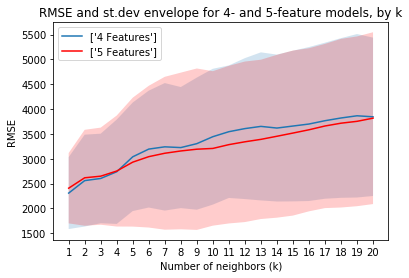

In [40]:
fig, ax = plt.subplots()
f1 = ax.plot(k_nums,results_best_4["avg_rmse"],label=["4 Features"])
f2 = ax.fill_between(k_nums, results_best_4["rmse_lower"], results_best_4["rmse_upper"], alpha=0.2)
f3 = ax.plot(k_nums,results_best_5["avg_rmse"],"r",label=["5 Features"])
f4 = ax.fill_between(k_nums, results_best_5["rmse_lower"], results_best_5["rmse_upper"], facecolor='red', alpha=0.2)
plt.legend(loc="upper left")
ax.set_xticks(k_nums)
ax.set_xlabel("Number of neighbors (k)")
ax.set_ylabel("RMSE")
ax.set_title("RMSE and st.dev envelope for 4- and 5-feature models, by k")

When the data is rescaled to between 0 and 1, the best model results (taking into account both average RMSE and RMSE standard deviation) are achieved for: 
- Number of neighbors (k): 1
- Number of features: 4 (engine_size, horsepower, curb_weight, highway_mpg)

Furthermore, the RMSE value of the best combination is 2307.7, less than the 2526.8 of the best combination for the previous scaling method.